<a href="https://colab.research.google.com/github/Sekoudioum/Dioumessy_ML/blob/main/Projet_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/drive/MyDrive/EEG_Eye_State_Classification.csv')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report 


In [113]:
! git clone https://github.com/Sekoudioum/Dioumessy_ML.git

Cloning into 'Dioumessy_ML'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [81]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [82]:
df_corr= df.corr().abs()
df_corr.style.background_gradient()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
AF3,1.000000,0.261146,0.474569,0.012173,0.278938,0.007958,0.006630,0.040539,0.999607,0.070801,0.572997,0.394334,0.998714,0.012070,0.010458
F7,0.261146,1.000000,0.583317,0.208922,0.250816,0.042288,0.210591,0.517816,0.264922,0.489010,0.317418,0.275977,0.251327,0.071895,0.079994
F3,0.474569,0.583317,1.000000,0.330162,0.272186,0.596566,0.335514,0.221270,0.486506,0.191273,0.517950,0.116761,0.500276,0.637363,0.038902
FC5,0.012173,0.208922,0.330162,1.000000,0.504616,0.009049,0.999961,0.130482,0.013228,0.519498,0.420311,0.515388,0.005351,0.161155,0.007531
T7,0.278938,0.250816,0.272186,0.504616,1.000000,0.409277,0.504231,0.030063,0.264913,0.225508,0.336173,0.095902,0.267107,0.478852,0.000369
P7,0.007958,0.042288,0.596566,0.009049,0.409277,1.000000,0.013707,0.208167,0.012528,0.420539,0.196873,0.229149,0.030921,0.988310,0.007845
O1,0.006630,0.210591,0.335514,0.999961,0.504231,0.013707,1.000000,0.133434,0.007638,0.515699,0.417041,0.517621,0.011080,0.165730,0.007223
O2,0.040539,0.517816,0.221270,0.130482,0.030063,0.208167,0.133434,1.000000,0.047843,0.640387,0.433333,0.577013,0.020493,0.224627,0.025100
P8,0.999607,0.264922,0.486506,0.013228,0.264913,0.012528,0.007638,0.047843,1.000000,0.074047,0.577472,0.385643,0.998849,0.008055,0.009576
T8,0.070801,0.489010,0.191273,0.519498,0.225508,0.420539,0.515699,0.640387,0.074047,1.000000,0.038252,0.132692,0.082256,0.336282,0.047218


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [84]:
#upper_tri = df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(np.bool))
#print(upper_tri)

In [85]:
#to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]

In [86]:
#to_drop

In [87]:
#df_new= df.drop(to_drop, axis=1)

In [88]:
#df_new.info()

In [89]:
df_0= df[df['eyeDetection']==0]
df_1=df[df['eyeDetection']==1]
df_O_sample=df_0.sample(n=600)
df_1_sample=df_1.sample(df_O_sample.shape[0])

df_new_= pd.concat([df_O_sample, df_1_sample])

In [90]:
df_new_.isna().sum().sort_values()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

In [91]:
features= df_new_.drop('eyeDetection', axis=1).values
labels=df_new_['eyeDetection'].values

In [92]:
X_train, X_test, y_train, y_test=train_test_split(features, labels, stratify=labels, test_size=0.2)

In [93]:
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [94]:
# pca= PCA()
# pca.fit(X_train_scaled, y_train)
# pca_variance= pca.explained_variance_ratio_
# features=range(pca.n_components_)
# fig, ax= plt.subplots()

# ax.bar(features, pca_variance)
# ax.set_xlabel('principal comoponents')
# ax.set_ylabel('variance ie directions of principal components')
# plt.show()


In [95]:
# pca= PCA(n_components=2)
# X_train_pca= pca.fit_transform(X_train_scaled)
# X_test_pca= pca.transform(X_test_scaled)

In [96]:
# X_train_pca.shape[0], y_train.shape[0]

Models

K_Voisins

In [97]:
knn=KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_train_score= knn.score(X_train_scaled, y_train)
knn_predict=knn.predict(X_test_scaled)
#knn_test_score= float(np.sum(knn_predict==y_test)/y_test.shape[0] )
knn_test_score= accuracy_score(y_test, knn_predict)
print('knn training score {:.2f}'.format(knn_train_score))
print('knn test score {:.2f}'.format(knn_test_score))


knn training score 0.89
knn test score 0.61


SVM(Kernel_Linear)

In [98]:
svm=LinearSVC(C=.0001)
svm.fit(X_train_scaled, y_train)
svm_training_score= svm.score(X_train_scaled, y_train)
svm_predict=svm.predict(X_test_scaled)
svm_test_score= accuracy_score(y_test, svm_predict)
print('svm training score {:2f}'.format(svm_training_score))
print('svm test score {:2f}'.format(svm_test_score))

svm training score 0.563542
svm test score 0.583333


Logistic_Regresssion

In [99]:
logreg= LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg_train_score= logreg.score(X_train_scaled, y_train)
logreg_predict=logreg.predict(X_test_scaled)
logreg_test_score= float(np.sum(logreg_predict==y_test)/y_test.shape[0])
print('logistic regression training score {:2f}'.format(logreg_train_score))
print('logistic regression test score {:2f}'.format(logreg_test_score))

logistic regression training score 0.631250
logistic regression test score 0.570833


DecisionTreeClassifier

In [100]:
tree=DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
tree_predict= tree.predict(X_test_scaled)
tree_train_score=tree.score(X_train_scaled, y_train)
tree_test_score= accuracy_score(y_test, tree_predict)
print('tree training score {:2f}'.format(tree_train_score))
print('tree test score {:2f}'.format(tree_test_score))

tree training score 1.000000
tree test score 0.479167


SGD Classifier

In [101]:
sgd=SGDClassifier()
sgd.fit(X_train_scaled, y_train)
sgd_predict= sgd.predict(X_test_scaled)
sgd_train_score= sgd.score(X_train_scaled, y_train)
sgd_test_score= accuracy_score(y_test, sgd_predict)

print('sgd training score {:2f}'.format(sgd_train_score))
print('sgd test score {:2f}'.format(sgd_test_score))


sgd training score 0.640625
sgd test score 0.579167


Random_Forest_Classifier

In [102]:
rf= RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf_predict= rf.predict(X_test_scaled)
rf_train_score= rf.score(X_train_scaled, y_train)
rf_test_score= accuracy_score(y_test, rf_predict)

print('rf training score {:2f}'.format(rf_train_score))
print('rf test score {:2f}'.format(rf_test_score))

rf training score 1.000000
rf test score 0.575000


In [103]:
def cross_validation_score():
  results=[]
  models=[('logistic regression', logreg),
          ('Kneighors', knn), 
          ('svm', svm),
          ('random forest', rf),
          ('Decision tree', tree),
          ('SGD classifier', sgd)
           ]
  for name, model in models:
    cv_score= cross_val_score(model, X_train_scaled, y_train, cv=5)
    results.append(cv_score)
    print('{}  score is {}'.format(name, np.mean(cv_score)))


In [104]:
cross_validation_score()

logistic regression  score is 0.61875
Kneighors  score is 0.8041666666666666
svm  score is 0.5718750000000001
random forest  score is 0.803125
Decision tree  score is 0.7250000000000001
SGD classifier  score is 0.6010416666666667


In [105]:
def boxplots_evaluation():
  models={'logistic_regression':
          logreg,
          'Kneighbors': knn,
          'svm_linear': svm, 
          'Random_Forest': rf,
          'Decision_Tree ': tree,
          'SGD_Classifier': sgd
        }
  score=[]
  for model_ in models.values():
    cros_valid_score= cross_val_score(model_, X_train_scaled, y_train, cv=10 )
    score.append(cros_valid_score)

  fig, ax= plt.subplots(figsize=(12,8))
  ax.boxplot(score, labels= models.keys())
  ax.set_title('boxplots to check for the best model')
  plt.show()


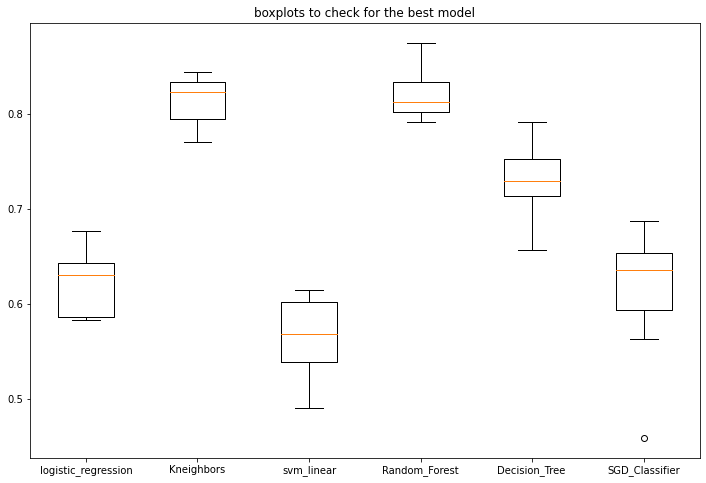

In [106]:
boxplots_evaluation()

In [111]:
def calcul_matrix_classification_report():
  classif_report= classification_report(y_test, logreg_predict)
  print('classification report of logreg \n: {}'.format(classif_report))
  print('\n')
  conf_matrix=confusion_matrix(y_test, logreg_predict)
  fig, ax= plt.subplots()
  sns.heatmap(conf_matrix, cmap='Blues',annot=True,cbar=True)
  ax.set_xlabel('predicted class')
  ax.set_ylabel('actual class')
  ax.set_title('Confusion matrix of Logistic regression')
  plt.show()

classification report of logreg 
:               precision    recall  f1-score   support

           0       0.58      0.54      0.56       120
           1       0.57      0.60      0.58       120

    accuracy                           0.57       240
   macro avg       0.57      0.57      0.57       240
weighted avg       0.57      0.57      0.57       240





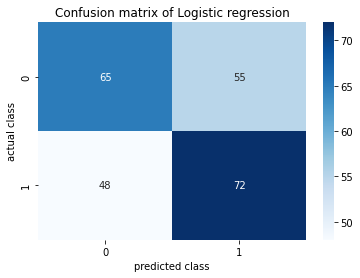

In [112]:
calcul_matrix_classification_report()

In [109]:
data=pd.DataFrame({'Models':['Kneighbors','logistic_regression','svm_linear', 'Random_Forest', 'Decision_Tree', 'SGD_Classifier'],
       'training accuracy score':[knn_train_score, logreg_train_score,
                                  svm_training_score, rf_train_score,
                                  tree_train_score, sgd_train_score] ,
       'Score':[knn_test_score, logreg_test_score,svm_test_score
                                , rf_test_score, tree_test_score, sgd_test_score]
       })

In [110]:
data.sort_values(by='Score', ascending=False)

,Models,training accuracy score,Score
0,Kneighbors,0.890625,0.608333
2,svm_linear,0.563542,0.583333
5,SGD_Classifier,0.640625,0.579167
3,Random_Forest,1.000000,0.575000
1,logistic_regression,0.631250,0.570833
4,Decision_Tree,1.000000,0.479167
